/home/stiffi/anaconda3/envs/pusher/lib/python3.10/site-packages/torch/cuda/__init__.py:118: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 9010). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
/home/stiffi/anaconda3/envs/pusher/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
100%|██████████| 100/100 [00:13<00:00,  7.62it/s]


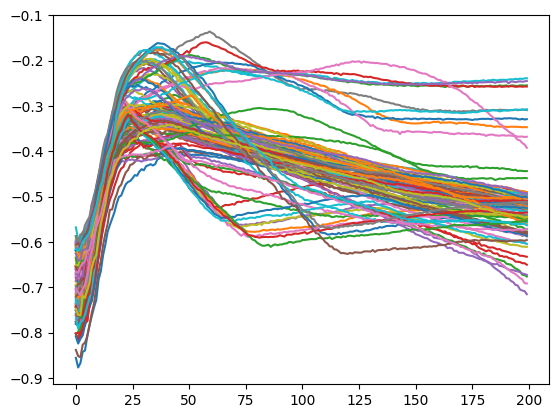

In [2]:
import os
import gymnasium as gym
import matplotlib.pyplot as plt

from tqdm import tqdm
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.env_util import make_vec_env

env = gym.make("Pusher-v4", render_mode='rgb_array', max_episode_steps=200)
vec_env = make_vec_env(lambda:env, n_envs=1)

path = os.getcwd()
savepath = os.path.join(path, os.pardir)

model = PPO.load(f"{savepath}/models/ppo_2M_200ep_standard")


seeds = [3559, 3216, 7890, 5242, 4924, 3588, 722, 8119]
seeds = [i for i in range(100)]

rewards_lst=[]
for seed in tqdm(seeds):
    vec_env.seed(seed)
    state = vec_env.reset()
    rewards_i = []
    while True:
        action, _states = model.predict(state)
        state, rewards, dones, info = vec_env.step(action)
        #print(rewards)
        #vec_env.render("human")
        rewards_i.append(rewards)


        if dones:
            break
    rewards_lst.append(rewards_i)


p = []
latex = []
for r, s in zip(rewards_lst, seeds):

    x = [i for i in range(len(r))]
    y = r

    plt.plot(x, y)
